In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [3]:
#do web pulls. 

# 14 day data table from the web page
url = 'https://www.ecdc.europa.eu/en/cases-2019-ncov-eueea'
df = pd.read_html(url)[0]

# 14 day data table-pull html to get the title with the date to use as title for the graph
html = requests.get(url)
soup = BeautifulSoup(html.content)

# pull timeseries data
url='https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx'
data_raw = pd.read_excel(url)

In [7]:
# do some preprocessing. Rename columns on the table and select the right columns and put in new dataframes
# data  is the cutdown table from the webpage
# series is the timeseries cutdown

new_df = df.rename(columns = {'EU/EEA and the UK':'Country','14-day cumulative number of COVID-19 cases per 100 000' : 'rate'})
data =  new_df[['Country','rate']]
data = data.sort_values('rate')
series = data_raw[['dateRep','countriesAndTerritories','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']]

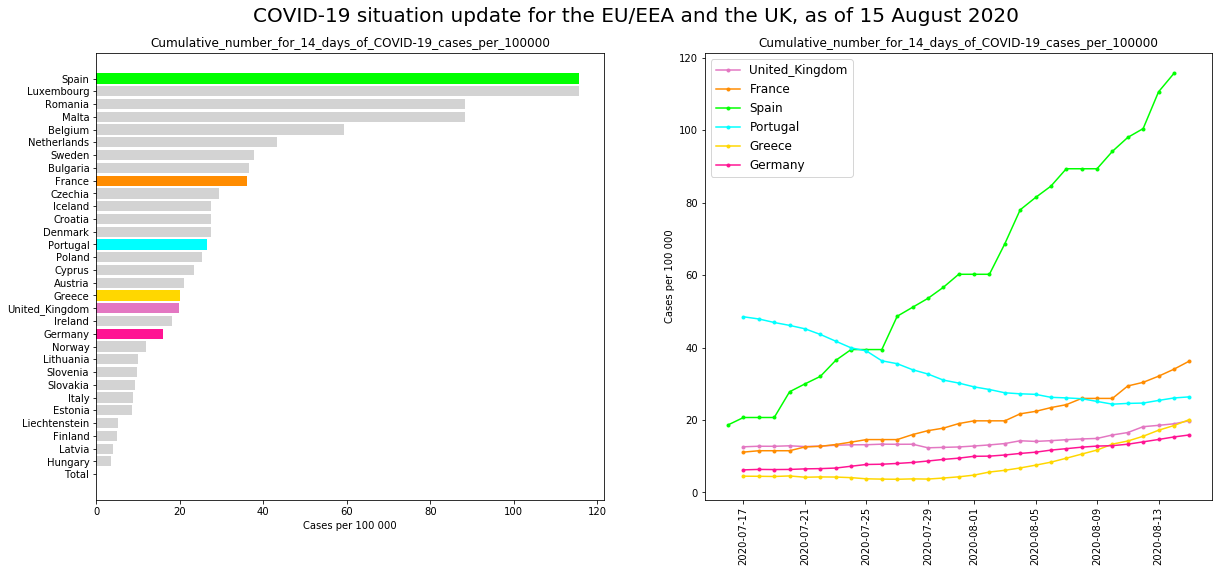

In [85]:
#set the colours and define the countries of interest

interesting_countries = ['United_Kingdom','France','Spain','Portugal','Greece','Germany']
country_colours = ['tab:pink','darkorange','lime','aqua', 'gold','deeppink']
default_colour = 'lightgrey'
days_back = 30

# can also set the colours as tableau colours for the countries of interest.... https://matplotlib.org/3.1.0/gallery/color/named_colors.html
# country_colours = ['tab:red','tab:orange','tab:green','tab:blue', 'tab:purple','tab:brown']
# default_colour = 'tab:grey'

# Asign the colours in the table 
data['colour'] = default_colour   # default colour for bars
for i in range(len(interesting_countries)):
    data.loc[data['Country']==interesting_countries[i],['colour']] = country_colours[i]

#------plot 2 graphs - one bar chart by country and then the timeseries for selected countries-----
#Set up the template and set title from the webpage title
fig, ax = plt.subplots(1,2, figsize=(20,8))
fig.suptitle(soup.title.string,fontsize=20)
fig.subplots_adjust(top=0.90)
#fig.text(0.99,0,'Source - ECDC',fontsize = 10)

#bar chart ax[0]
ax[0].set(Title ='Cumulative_number_for_14_days_of_COVID-19_cases_per_100000')
x = ax[0].barh(data['Country'],data['rate'],tick_label=data['Country'],color =data['colour'])
xlabel = ax[0].set_xlabel('Cases per 100 000')

#time series ax[1] loop through the countries of interest
ax[1].set(Title ='Cumulative_number_for_14_days_of_COVID-19_cases_per_100000')
for country in interesting_countries:
    ax[1].plot(series[series['countriesAndTerritories']==country][:days_back ]['dateRep'],
               series[series['countriesAndTerritories']==country][:days_back ]['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
               '.-',
               color = data[data['Country']==country]['colour'].values[0],
               label= country)
legend = ax[1].legend(loc=2, prop={'size': 12})
plt.setp(plt.xticks()[1], rotation=90)
ylabel = ax[1].set_ylabel('Cases per 100 000')


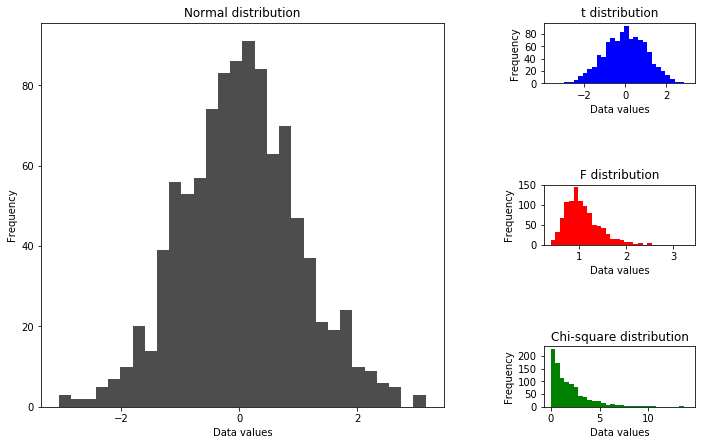

In [87]:
#histograms and unequal frames

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# Generate data
dist_norm = np.random.normal(loc=0, scale=1, size=1000)
dist_tdis = np.random.standard_t(df=29, size=1000)
dist_fdis = np.random.f(dfnum=59, dfden=28, size=1000)
dist_chsq = np.random.chisquare(df=2, size=1000)

# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(3,3)

# large subplot
plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Normal distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_norm, bins=30, color='0.30')

# small subplot 1
plt.subplot2grid((3,3), (0,2))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('t distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_tdis, bins=30, color='b')

# small subplot 2
plt.subplot2grid((3,3), (1,2))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('F distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_fdis, bins=30, color='r')

# small subplot 3
plt.subplot2grid((3,3), (2,2))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Chi-square distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_chsq, bins=30, color='g')

# fit subplots and save fig
fig.tight_layout()
fig.set_size_inches(w=11,h=7)
fig_name = 'plot.png'
fig.savefig(fig_name)

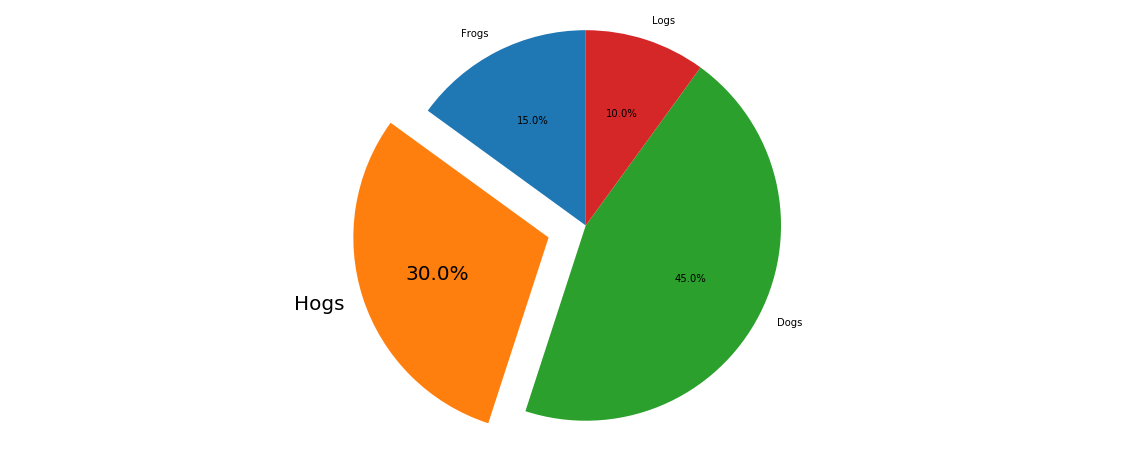

In [99]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.2, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(20,8))
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
texts[1].set_fontsize(20)
autotexts[1].set_fontsize(20)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()